#### Variable sourced from https://api.census.gov/data/2020/acs/acs5/variables.html

In [74]:
import pandas as pd
import requests
from census import Census
from us import states
import geopandas as gpd
pd.set_option('display.max_columns', None)

In [67]:
c = Census('a2f9b25de83808dfee07b8fca577b52ccace6042')
state = '54'
county = '069'
tract = '*'
query = c.acs5.state_county_tract(fields = ('NAME','B02001_001E','B02001_002E','B02001_003E','B02001_004E','B02001_005E','B02001_006E','B02001_007E','B02001_008E','B02001_009E','B02001_010E'),
                                  state_fips = state, county_fips = county, tract = '*')

In [120]:
c = Census('a2f9b25de83808dfee07b8fca577b52ccace6042')
state = '54'
county = '069'
tract = '*'
query = c.acs5.state_county_blockgroup(fields = ('NAME','B02001_001E','B02001_002E','B02001_003E','B02001_004E','B02001_005E','B02001_006E','B02001_007E','B02001_008E','B02001_009E','B02001_010E'),
                                  state_fips = state, county_fips = county, blockgroup = '*')

In [121]:
df = pd.DataFrame.from_records(query)
df

,NAME,B02001_001E,B02001_002E,B02001_003E,B02001_004E,B02001_005E,B02001_006E,B02001_007E,B02001_008E,B02001_009E,B02001_010E,state,county,tract,block group
0,"Block Group 3, Census Tract 21, Ohio County, W...",1333.000,1312.000,4.000,0.000,0.000,0.000,0.000,17.000,0.000,17.000,54,069,002100,3
1,"Block Group 2, Census Tract 22, Ohio County, W...",1285.000,1266.000,0.000,0.000,19.000,0.000,0.000,0.000,0.000,0.000,54,069,002200,2
2,"Block Group 3, Census Tract 26, Ohio County, W...",439.000,425.000,14.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,54,069,002600,3
3,"Block Group 2, Census Tract 27, Ohio County, W...",192.000,161.000,31.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,54,069,002700,2
4,"Block Group 3, Census Tract 2, Ohio County, We...",787.000,593.000,0.000,0.000,0.000,0.000,0.000,194.000,194.000,0.000,54,069,000200,3
5,"Block Group 2, Census Tract 3, Ohio County, We...",577.000,531.000,29.000,0.000,0.000,0.000,0.000,17.000,0.000,17.000,54,069,000300,2
6,"Block Group 1, Census Tract 5, Ohio County, We...",696.000,672.000,6.000,0.000,13.000,0.000,0.000,5.000,0.000,5.000,54,069,000500,1
7,"Block Group 2, Census Tract 6, Ohio County, We...",468.000,412.000,56.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,54,069,000600,2
8,"Block Group 1, Census Tract 13, Ohio County, W...",633.000,616.000,0.000,0.000,0.000,0.000,0.000,17.000,0.000,17.000,54,069,001300,1
9,"Block Group 2, Census Tract 14, Ohio County, W...",1332.000,1269.000,48.000,0.000,0.000,0.000,0.000,15.000,0.000,15.000,54,069,001400,2


In [66]:
df = df.rename(columns = {'B02001_001E':'Total','B02001_002E':'White Alone','B02001_003E': 'Black or African American Alone','B02001_004E': 'American Indian and Alaska Native Alone','B02001_005E': 'Asian Alone','B02001_006E': 'Native Hawaiian and Other Pacific Islander alone','B02001_007E': 'Some other race alone','B02001_008E': 'Two or more races','B02001_009E': 'Two races including Some other race','B02001_010E': 'Two races excluding Some other race, and three or more races'})
df

,NAME,Total,White Alone,Black or African American Alone,American Indian and Alaska Native Alone,Asian Alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races,Two races including Some other race,"Two races excluding Some other race, and three or more races",state,county,tract
0,"Census Tract 2, Ohio County, West Virginia",3082.0,2762.0,71.0,0.0,0.0,0.0,5.0,244.0,223.0,21.0,54,069,000200
1,"Census Tract 3, Ohio County, West Virginia",1776.0,1499.0,146.0,0.0,12.0,0.0,19.0,100.0,0.0,100.0,54,069,000300
2,"Census Tract 4, Ohio County, West Virginia",1009.0,785.0,165.0,0.0,7.0,0.0,0.0,52.0,0.0,52.0,54,069,000400
3,"Census Tract 5, Ohio County, West Virginia",1539.0,1334.0,187.0,0.0,13.0,0.0,0.0,5.0,0.0,5.0,54,069,000500
4,"Census Tract 6, Ohio County, West Virginia",1284.0,1083.0,174.0,0.0,0.0,0.0,0.0,27.0,10.0,17.0,54,069,000600
5,"Census Tract 7, Ohio County, West Virginia",955.0,568.0,258.0,15.0,0.0,0.0,34.0,80.0,46.0,34.0,54,069,000700
6,"Census Tract 13, Ohio County, West Virginia",1359.0,1303.0,0.0,0.0,0.0,0.0,0.0,56.0,0.0,56.0,54,069,001300
7,"Census Tract 14, Ohio County, West Virginia",3288.0,3145.0,65.0,0.0,1.0,0.0,8.0,69.0,0.0,69.0,54,069,001400
8,"Census Tract 15, Ohio County, West Virginia",2448.0,2338.0,80.0,13.0,7.0,0.0,0.0,10.0,4.0,6.0,54,069,001500
9,"Census Tract 16, Ohio County, West Virginia",2370.0,2307.0,1.0,0.0,0.0,0.0,41.0,21.0,0.0,21.0,54,069,001600


In [69]:
shp = r"C:\Urban3\WheelingWV\Standardized\wv_ohio_.zip"
gdf = gpd.read_file(shp)

In [75]:
gdf

,MergeID,County,State,TotVal,MrkVal,BdVal,LndVal,VPA,LndVPA,Acre,TaxBill,EffTxRt,Lnduse,Lndcode,ExmptAmt,ExmptCd,Yrbuilt,Sqf,Notes,Address,Owner,PIN,comps,area_class,lon_wgs,lat_wgs,PL_GEOID,PL_NAME,PL_LSAD,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,geometry
0,FID1,Ohio,West Virginia,5800.0,3480.0,0,5800,5.174343e+04,None,0.112092,None,2,100 - Residential Vacant,100,None,Residential,None,None,None,RESERVOIR RD,GARCEAU AMY MARIE & JOSHUA,3506T12K000700000000,None,Tridelphia District,-80.652631,40.038589,None,None,None,54,069,001800,3009,540690018003009,"POLYGON ((-80.65251 40.03844, -80.65267 40.038..."
1,FID10,Ohio,West Virginia,75900.0,45540.0,58100,17800,1.154030e+06,None,0.065770,None,2,101 - Residential 1 Family,101,None,Residential,1920,None,None,117 N 9TH ST,LAKE MICHAEL D & BONNIE JO,35100W10007500000000,None,Wheeling City Corp,-80.699789,40.111712,5486452,Wheeling,25,54,069,000200,3026,540690002003026,"POLYGON ((-80.69972 40.11160, -80.69984 40.111..."
2,FID100,Ohio,West Virginia,212900.0,127740.0,165400,47500,1.857966e+06,None,0.114588,None,2,101 - Residential 1 Family,101,None,Residential,1941,None,None,17 GREENWOOD AVE,SCAMMELL CATHY L,35100W54037000000000,None,Wheeling City Corp,-80.681927,40.067043,5486452,Wheeling,25,54,069,001400,4003,540690014004003,"POLYGON ((-80.68173 40.06703, -80.68206 40.066..."
3,FID1000,Ohio,West Virginia,13300.0,7980.0,0,13300,3.247936e+04,None,0.409491,None,4,100 - Residential Vacant,100,None,Residential,None,None,None,610 S FRONT ST,NOLTE ENTERPRISES LLC,35100W50027000000000,None,Wheeling City Corp,-80.728584,40.064687,5486452,Wheeling,25,54,069,000600,1024,540690006001024,"POLYGON ((-80.72828 40.06458, -80.72892 40.064..."
4,FID10000,Ohio,West Virginia,900.0,540.0,0,900,3.871904e+03,None,0.232444,None,2,100 - Residential Vacant,100,None,Residential,None,None,None,70 FORNEY DR WHEELING 26003,ESTEP MARK & JEANENE,35100W24000200000000,None,Wheeling City Corp,-80.703020,40.090472,5486452,Wheeling,25,54,069,000300,1001,540690003001001,"POLYGON ((-80.70282 40.09032, -80.70322 40.090..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25686,FID9995,Ohio,West Virginia,192700.0,115620.0,159100,33600,1.911023e+06,None,0.100836,None,2,101 - Residential 1 Family,101,None,Residential,1928,None,None,19 LINDEN AVE,VON DEUTEN KLAUS AND SUSAN J,35100W47019000000000,None,Wheeling City Corp,-80.685201,40.073336,5486452,Wheeling,25,54,069,001400,2010,540690014002010,"POLYGON ((-80.68505 40.07322, -80.68518 40.073..."
25687,FID9996,Ohio,West Virginia,11700.0,0.0,0,11700,0.000000e+00,None,0.091487,None,4,100 - Residential Vacant,100,None,Exempt,None,None,None,2209 MARSHALL AVE,ST MARK EVANGELICAL LUTHERAN CHURCH TRUSTEES,35100W86025000000000,None,Wheeling City Corp,-80.657242,40.039578,5486452,Wheeling,25,54,069,001800,4030,540690018004030,"POLYGON ((-80.65708 40.03950, -80.65719 40.039..."
25688,FID9997,Ohio,West Virginia,51500.0,30900.0,31200,20300,4.647739e+05,None,0.110807,None,2,101 - Residential 1 Family,101,None,Residential,1953,None,None,8 GREENLAWN LN,BAKER TERI L & MARK C WALLER,35100W53023700000000,None,Wheeling City Corp,-80.689714,40.065277,5486452,Wheeling,25,54,069,001400,1022,540690014001022,"POLYGON ((-80.68950 40.06533, -80.68950 40.065..."
25689,FID9998,Ohio,West Virginia,126200.0,75720.0,91200,35000,6.004512e+05,None,0.210175,None,2,101 - Residential 1 Family,101,None,Residential,1925,None,None,20 FAIRFAX DR,CONWAY BRIAN & STACEY,35100W55001700000000,None,Wheeling City Corp,-80.677687,40.066557,5486452,Wheeling,25,54,069,001600,2001,540690016002001,"POLYGON ((-80.67742 40.06656, -80.67790 40.066..."


In [84]:
# Get only Residential Parcels
res_pars = gdf[(gdf['Lnduse'] == '100 - Residential Vacant') | (gdf['Lnduse'] == '101 - Residential 1 Family')]
res_pars = res_pars[res_pars['ExmptCd'] != 'Exempt']
res_pars = res_pars.astype({'BdVal': 'int32', 'LndVal': 'int32'})

In [103]:
res_pars_group = res_pars.groupby('TRACTCE20', as_index=False).sum()
# res_pars_group = res_pars_group.rename(columns = {'TRACTCE20': 'tract'})
res_pars_group

,TRACTCE20,TotVal,MrkVal,BdVal,LndVal,VPA,Acre,lon_wgs,lat_wgs
0,000200,108573200.0,65143920.0,82867400,25705800,1.038936e+09,444.113810,-113706.036564,56525.604042
1,000300,79643300.0,47785980.0,64496500,15146800,3.483676e+08,450.251527,-57544.173657,28578.923090
2,000400,6443500.0,3866100.0,5142900,1300600,9.673752e+07,77.738349,-36889.908318,18317.254304
3,000500,26515500.0,15909300.0,20263800,6251700,2.903781e+08,62.092137,-46502.576997,23084.075426
4,000600,13885800.0,8331480.0,9693700,4192100,1.580047e+08,49.914046,-41738.591329,20715.234875
5,000700,5760600.0,3456360.0,4643900,1116700,7.976683e+07,64.469653,-45604.128908,22639.425486
6,001300,38460900.0,23076540.0,32147100,6313800,1.816562e+08,648.447752,-72400.288123,35917.957717
7,001400,114308000.0,68584800.0,83830700,30477300,8.880655e+08,310.137931,-85610.296169,42512.680096
8,001500,180435400.0,108261240.0,142744500,37690900,9.024146e+08,527.382269,-89077.723914,44252.012439
9,001600,144726300.0,86835780.0,110706200,34020100,7.760430e+08,393.555897,-63250.663717,31416.160482


In [104]:
demo_group = df.groupby('tract', as_index=False).sum()
demo_group

,tract,Total,White Alone,Black or African American Alone,American Indian and Alaska Native Alone,Asian Alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races,Two races including Some other race,"Two races excluding Some other race, and three or more races"
0,000200,3082.0,2762.0,71.0,0.0,0.0,0.0,5.0,244.0,223.0,21.0
1,000300,1776.0,1499.0,146.0,0.0,12.0,0.0,19.0,100.0,0.0,100.0
2,000400,1009.0,785.0,165.0,0.0,7.0,0.0,0.0,52.0,0.0,52.0
3,000500,1539.0,1334.0,187.0,0.0,13.0,0.0,0.0,5.0,0.0,5.0
4,000600,1284.0,1083.0,174.0,0.0,0.0,0.0,0.0,27.0,10.0,17.0
5,000700,955.0,568.0,258.0,15.0,0.0,0.0,34.0,80.0,46.0,34.0
6,001300,1359.0,1303.0,0.0,0.0,0.0,0.0,0.0,56.0,0.0,56.0
7,001400,3288.0,3145.0,65.0,0.0,1.0,0.0,8.0,69.0,0.0,69.0
8,001500,2448.0,2338.0,80.0,13.0,7.0,0.0,0.0,10.0,4.0,6.0
9,001600,2370.0,2307.0,1.0,0.0,0.0,0.0,41.0,21.0,0.0,21.0


In [95]:
(2762/3082) * 100

89.61713173264114

In [105]:
demo_group['% Non White Alone'] = 100 - ((demo_group['White Alone']/demo_group['Total']) * 100)

In [106]:
demo_group

,tract,Total,White Alone,Black or African American Alone,American Indian and Alaska Native Alone,Asian Alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races,Two races including Some other race,"Two races excluding Some other race, and three or more races",% Non White Alone
0,000200,3082.0,2762.0,71.0,0.0,0.0,0.0,5.0,244.0,223.0,21.0,10.382868
1,000300,1776.0,1499.0,146.0,0.0,12.0,0.0,19.0,100.0,0.0,100.0,15.596847
2,000400,1009.0,785.0,165.0,0.0,7.0,0.0,0.0,52.0,0.0,52.0,22.200198
3,000500,1539.0,1334.0,187.0,0.0,13.0,0.0,0.0,5.0,0.0,5.0,13.320338
4,000600,1284.0,1083.0,174.0,0.0,0.0,0.0,0.0,27.0,10.0,17.0,15.654206
5,000700,955.0,568.0,258.0,15.0,0.0,0.0,34.0,80.0,46.0,34.0,40.523560
6,001300,1359.0,1303.0,0.0,0.0,0.0,0.0,0.0,56.0,0.0,56.0,4.120677
7,001400,3288.0,3145.0,65.0,0.0,1.0,0.0,8.0,69.0,0.0,69.0,4.349148
8,001500,2448.0,2338.0,80.0,13.0,7.0,0.0,0.0,10.0,4.0,6.0,4.493464
9,001600,2370.0,2307.0,1.0,0.0,0.0,0.0,41.0,21.0,0.0,21.0,2.658228


In [109]:
merged = res_pars_group.merge(demo_group, how = 'left', left_on='TRACTCE20', right_on = 'tract')

In [115]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [116]:
merged

,TRACTCE20,TotVal,MrkVal,BdVal,LndVal,VPA,Acre,lon_wgs,lat_wgs,tract,Total,White Alone,Black or African American Alone,American Indian and Alaska Native Alone,Asian Alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races,Two races including Some other race,"Two races excluding Some other race, and three or more races",% Non White Alone
0,000200,108573200.000,65143920.000,82867400,25705800,1038935998.214,444.114,-113706.037,56525.604,000200,3082.000,2762.000,71.000,0.000,0.000,0.000,5.000,244.000,223.000,21.000,10.383
1,000300,79643300.000,47785980.000,64496500,15146800,348367633.195,450.252,-57544.174,28578.923,000300,1776.000,1499.000,146.000,0.000,12.000,0.000,19.000,100.000,0.000,100.000,15.597
2,000400,6443500.000,3866100.000,5142900,1300600,96737519.260,77.738,-36889.908,18317.254,000400,1009.000,785.000,165.000,0.000,7.000,0.000,0.000,52.000,0.000,52.000,22.200
3,000500,26515500.000,15909300.000,20263800,6251700,290378138.001,62.092,-46502.577,23084.075,000500,1539.000,1334.000,187.000,0.000,13.000,0.000,0.000,5.000,0.000,5.000,13.320
4,000600,13885800.000,8331480.000,9693700,4192100,158004748.601,49.914,-41738.591,20715.235,000600,1284.000,1083.000,174.000,0.000,0.000,0.000,0.000,27.000,10.000,17.000,15.654
5,000700,5760600.000,3456360.000,4643900,1116700,79766827.013,64.470,-45604.129,22639.425,000700,955.000,568.000,258.000,15.000,0.000,0.000,34.000,80.000,46.000,34.000,40.524
6,001300,38460900.000,23076540.000,32147100,6313800,181656157.029,648.448,-72400.288,35917.958,001300,1359.000,1303.000,0.000,0.000,0.000,0.000,0.000,56.000,0.000,56.000,4.121
7,001400,114308000.000,68584800.000,83830700,30477300,888065496.508,310.138,-85610.296,42512.680,001400,3288.000,3145.000,65.000,0.000,1.000,0.000,8.000,69.000,0.000,69.000,4.349
8,001500,180435400.000,108261240.000,142744500,37690900,902414646.383,527.382,-89077.724,44252.012,001500,2448.000,2338.000,80.000,13.000,7.000,0.000,0.000,10.000,4.000,6.000,4.493
9,001600,144726300.000,86835780.000,110706200,34020100,776043048.383,393.556,-63250.664,31416.160,001600,2370.000,2307.000,1.000,0.000,0.000,0.000,41.000,21.000,0.000,21.000,2.658


In [122]:
merged['LandVPA'] = merged['LndVal'] / merged['Acre']
merged['new_vpa'] = merged['MrkVal'] / merged['Acre']

C:\Users\natha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='% Non White Alone', ylabel='new_vpa'>

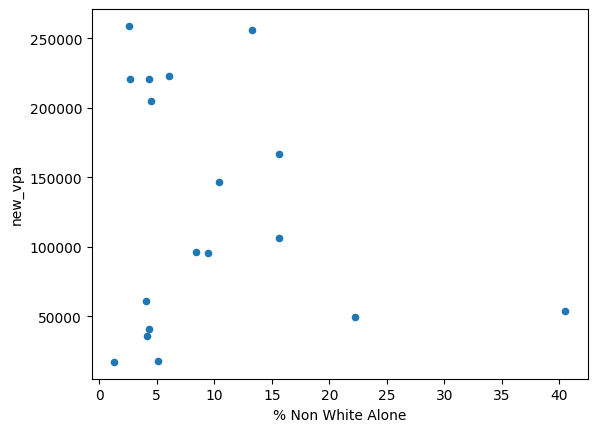

In [123]:
merged.plot(kind = 'scatter', y='new_vpa', x='% Non White Alone')

C:\Users\natha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='% Non White Alone', ylabel='LandVPA'>

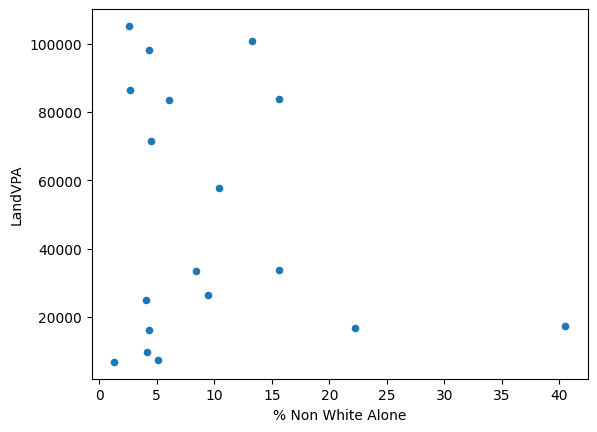

In [119]:
merged.plot(kind = 'scatter', y='LandVPA', x='% Non White Alone')